In [1]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import PIL.Image as Image


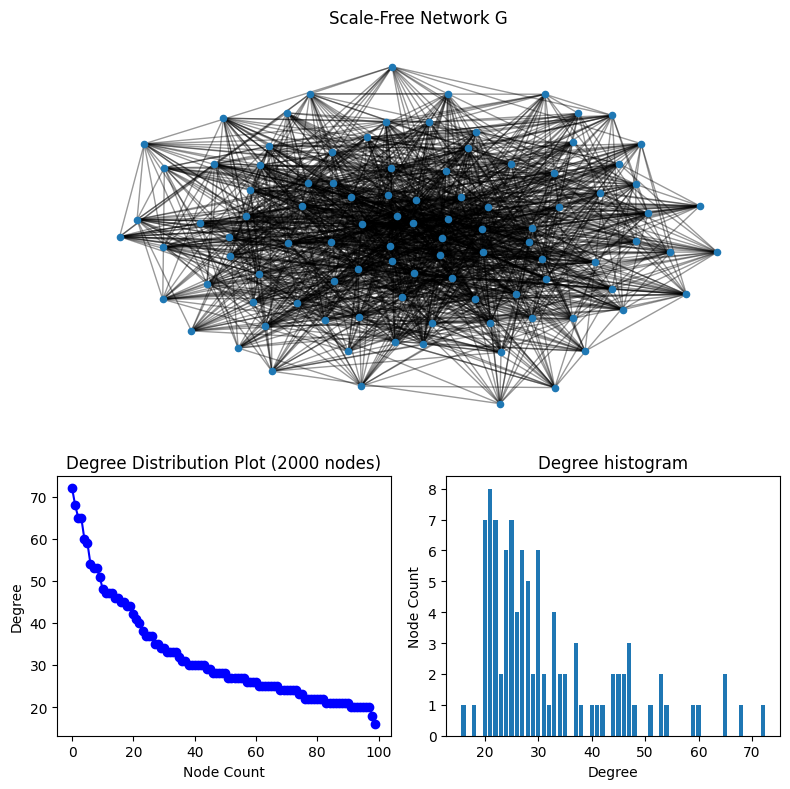

In [2]:
import networkx as nx
import numpy as np
import random as rd
import matplotlib.pyplot as plt
G = nx.barabasi_albert_graph(n = 100, m = 20)
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)
fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)
ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Scale-Free Network G")
ax0.set_axis_off()
ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Distribution Plot (2000 nodes)")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Node Count")
ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("Node Count")
fig.tight_layout()
plt.show()


In [3]:
import matplotlib.pyplot as plt
import networkx as nx
from tqdm import tqdm
import numpy as np
from scipy.optimize import curve_fit
from PIL import Image
import os

def power_law(x, a, b):
    return a * np.power(x, b)

filenames = []

for i in tqdm(range(1, 30)):   
    plt.figure(figsize = (20, 8))
    n = i*i*20
    m = i*10
    G = nx.barabasi_albert_graph(n = n, m = m)
    degree_sequence = sorted((d for _, d in G.degree()), reverse=True)
    
    # Calculate the degree distribution
    degrees, counts = np.unique(degree_sequence, return_counts=True)
    counts = counts / counts.sum()  # Normalize
    
    plt.subplot(1,2,1)
    plt.plot(degrees, counts)
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.title(f'Degree distribution of Barabási–Albert graph (n={n}, m={m})')
    plt.grid(True)
    
    plt.subplot(1,2,2)
    plt.loglog(degrees, counts, 'b-', label='Data')
    
    # Fit a power-law function and plot it
    params, _ = curve_fit(power_law, degrees, counts)
    plt.loglog(degrees, power_law(degrees, *params), 'r-', label='Fit: a=%5.3f, b=%5.3f' % tuple(params))
    
    plt.xlabel('Degree (log)')
    plt.ylabel('Frequency (log)')
    plt.title(f'Degree distribution of Barabási–Albert graph (n={n}, m={m})')
    plt.grid(True)
    plt.legend()
    
    filename = f'plot_{i}.png'
    plt.savefig(filename)
    filenames.append(filename)
    plt.clf()
    plt.close()

images = [Image.open(filename) for filename in filenames]
images[0].save('degree_distribution.gif', save_all=True, append_images=images[1:], optimize=False, duration=500, loop=0)

for filename in filenames:
    os.remove(filename)


100%|██████████| 29/29 [02:54<00:00,  6.01s/it]
